In [2]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
import os
rcParams['figure.figsize'] = 10, 6

In [4]:
df = pd.read_csv('DF_2NE1.CSV')

In [5]:
df.head()

,2NE1_zh.wikipedia.org_all-access_spider,date_idx
0,18,7/1/2015
1,11,7/2/2015
2,5,7/3/2015
3,13,7/4/2015
4,14,7/5/2015


In [7]:
len(df)

550

In [9]:
df.dtypes

2NE1_zh.wikipedia.org_all-access_spider     int64
date_idx                                   object
dtype: object

In [10]:
df['date_idx'] = pd.to_datetime(df['date_idx'], infer_datetime_format=True)

In [11]:
df.dtypes

2NE1_zh.wikipedia.org_all-access_spider             int64
date_idx                                   datetime64[ns]
dtype: object

In [12]:
df.head()

,2NE1_zh.wikipedia.org_all-access_spider,date_idx
0,18,2015-07-01
1,11,2015-07-02
2,5,2015-07-03
3,13,2015-07-04
4,14,2015-07-05


In [13]:
df.set_index(['date_idx'])

,2NE1_zh.wikipedia.org_all-access_spider
date_idx,
2015-07-01,18
2015-07-02,11
2015-07-03,5
2015-07-04,13
2015-07-05,14
...,...
2016-12-27,20
2016-12-28,22
2016-12-29,19


In [14]:
df.set_index(['date_idx'], drop=True, inplace=True)

In [31]:
df.head()

,2NE1_zh.wikipedia.org_all-access_spider
date_idx,
2015-07-01,18
2015-07-02,11
2015-07-03,5
2015-07-04,13
2015-07-05,14


In [25]:
df.isnull().any()

2NE1_zh.wikipedia.org_all-access_spider    False
dtype: bool

In [26]:
df.isnull().sum()

2NE1_zh.wikipedia.org_all-access_spider    0
dtype: int64

Text(0.5, 1.0, 'Search for 2NE1 on wikipedia - yearly')

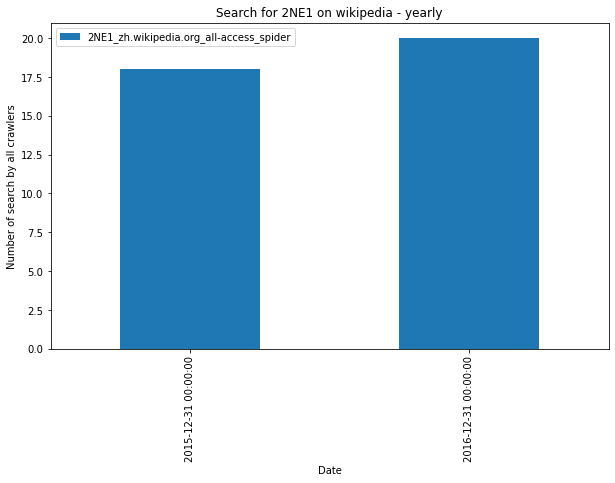

In [52]:
df.asfreq('Y').plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of search by all crawlers')
plt.title('Search for 2NE1 on wikipedia - yearly')

In [39]:
df.loc['2015-12-31']

2NE1_zh.wikipedia.org_all-access_spider    18
Name: 2015-12-31 00:00:00, dtype: int64

In [40]:
df.loc['2016-12-31']

2NE1_zh.wikipedia.org_all-access_spider    20
Name: 2016-12-31 00:00:00, dtype: int64

Text(0.5, 1.0, 'Search for 2NE1 on wikipedia - monthly')

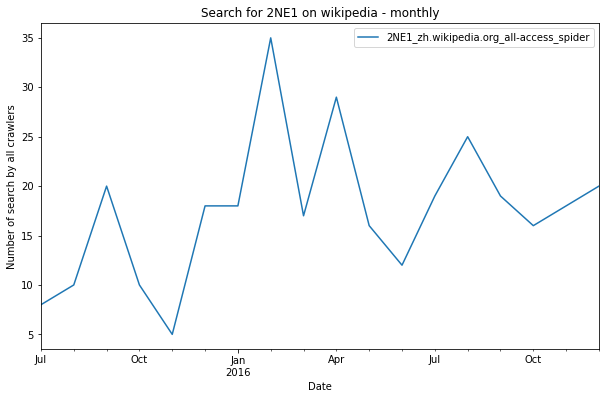

In [51]:
df.asfreq('M').plot()
plt.xlabel('Date')
plt.ylabel('Number of search by all crawlers')
plt.title('Search for 2NE1 on wikipedia - monthly')

**Be careful! Neither of the two charts above are not aggregating on month or year, but are visualizing values on the last day of each date (year or month depending on the granularity.)**
Check [this link](https://stackoverflow.com/questions/49089471/summing-and-plotting-by-month-and-arbitrary-attribute-in-pandas).

In [49]:
summed_df = df.groupby(pd.Grouper(freq = 'Y')).sum()
summed_df

,2NE1_zh.wikipedia.org_all-access_spider
date_idx,
2015-12-31,2974
2016-12-31,8992


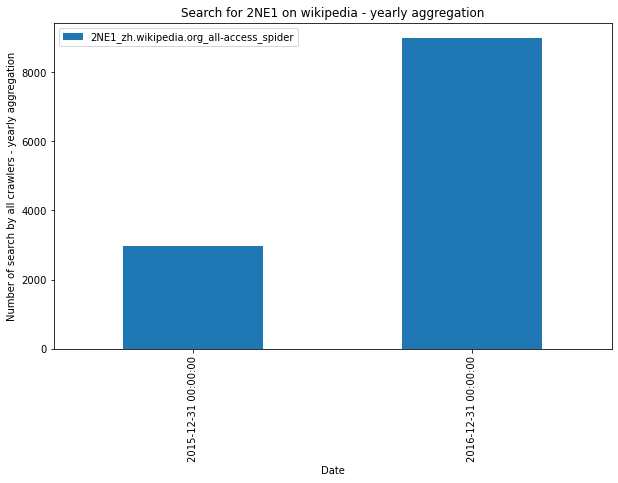

In [50]:
summed_df.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of search by all crawlers - yearly aggregation')
plt.title('Search for 2NE1 on wikipedia - yearly aggregation')
plt.show()

In [ ]:
# df.groupby(pd.Grouper())

In [41]:
summed_df = df.groupby([pd.Grouper(freq='1M')]).sum()

Text(0, 0.5, 'Number of search by all crawlers - monthly aggregation')

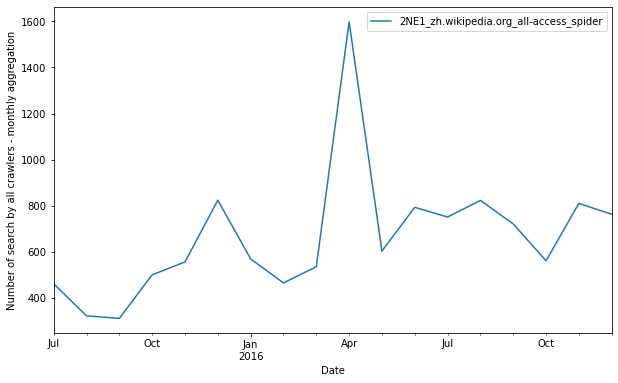

In [46]:
summed_df.plot()
plt.xlabel('Date')
plt.ylabel('Number of search by all crawlers - monthly aggregation')

In [45]:
summed_df.head()

,2NE1_zh.wikipedia.org_all-access_spider
date_idx,
2015-07-31,461
2015-08-31,322
2015-09-30,311
2015-10-31,500
2015-11-30,556


Text(0.5, 1.0, 'Search for 2NE1 on wikipedia - daily aggregation')

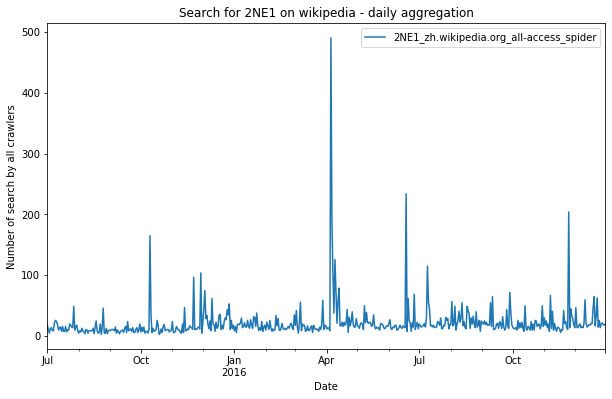

In [36]:
df.plot()
plt.xlabel('Date')
plt.ylabel('Number of search by all crawlers')
plt.title('Search for 2NE1 on wikipedia - daily aggregation')

Obviously it does not have any features of a stationary signal.

Stationarity definition:

+ constant mean during time
+ constant variance during time
+ constant covariance during time

We apply ACF PACF to show the signal is not stationary.

### Rolling statistics

Can be done by either rolling windows or expanding windows or ewm. It is different with mean of each month shown below. Rolling window makes a fixed size window and slide it over the values to calculate statistics like mean and std.

In [54]:
df.groupby([pd.Grouper(freq='1M')]).mean()

,2NE1_zh.wikipedia.org_all-access_spider
date_idx,
2015-07-31,14.870968
2015-08-31,10.387097
2015-09-30,10.366667
2015-10-31,16.129032
2015-11-30,18.533333
2015-12-31,26.580645
2016-01-31,18.354839
2016-02-29,16.034483
2016-03-31,17.258065


In [62]:
rollmean = df.rolling(window=30).mean()
rollstd = df.rolling(window=30).std()
print(rollmean, rollstd)

            2NE1_zh.wikipedia.org_all-access_spider
date_idx                                           
2015-07-01                                      NaN
2015-07-02                                      NaN
2015-07-03                                      NaN
2015-07-04                                      NaN
2015-07-05                                      NaN
...                                             ...
2016-12-27                                25.433333
2016-12-28                                25.066667
2016-12-29                                24.766667
2016-12-30                                24.766667
2016-12-31                                24.966667

[550 rows x 1 columns]             2NE1_zh.wikipedia.org_all-access_spider
date_idx                                           
2015-07-01                                      NaN
2015-07-02                                      NaN
2015-07-03                                      NaN
2015-07-04                              

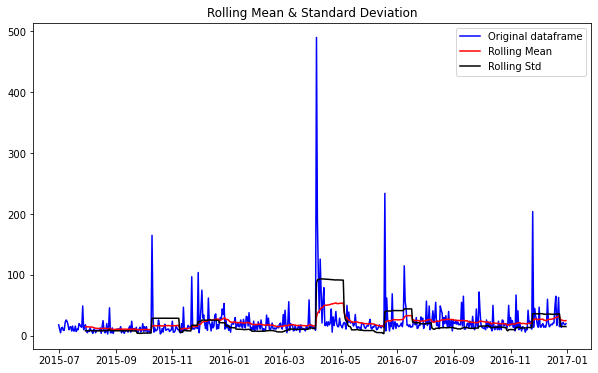

In [87]:
orig = plt.plot(df, color='blue', label='Original dataframe')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.savefig('mean_std.png')
plt.show(block=False)

Let's show it on monthly aggregated values:

In [66]:
df_m = df.groupby(pd.Grouper(freq='M')).sum()
df_m.head()

,2NE1_zh.wikipedia.org_all-access_spider
date_idx,
2015-07-31,461
2015-08-31,322
2015-09-30,311
2015-10-31,500
2015-11-30,556


In [70]:
rollmean_m = df_m.rolling(window=2).mean()
rollstd_m = df_m.rolling(window=2).std()
print(rollmean_m, rollstd_m)

            2NE1_zh.wikipedia.org_all-access_spider
date_idx                                           
2015-07-31                                      NaN
2015-08-31                                    391.5
2015-09-30                                    316.5
2015-10-31                                    405.5
2015-11-30                                    528.0
2015-12-31                                    690.0
2016-01-31                                    696.5
2016-02-29                                    517.0
2016-03-31                                    500.0
2016-04-30                                   1066.5
2016-05-31                                   1100.5
2016-06-30                                    698.0
2016-07-31                                    772.0
2016-08-31                                    787.0
2016-09-30                                    772.0
2016-10-31                                    641.0
2016-11-30                                    685.5
2016-12-31  

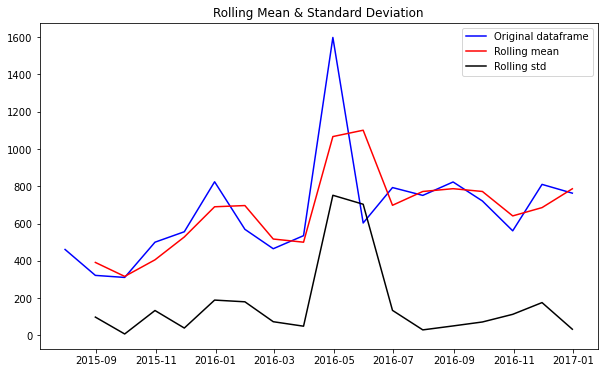

In [78]:
orig = plt.plot(df_m, color='blue', label='Original dataframe')
mean = plt.plot(rollmean_m, color = 'red', label = 'Rolling mean')
std = plt.plot(rollstd_m, color = 'black', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From both charts, by looking at mean and standard deviation we can see the signal is not stationary.

Now let's apply Dickey Fuller (ADCF) Test. 

In [82]:
df_test = adfuller(df)
pvalue = df_test[1]
df_test

(-8.884037701518482,
 1.2946704090248327e-14,
 3,
 546,
 {'1%': -3.442383534871275,
  '5%': -2.8668480382580386,
  '10%': -2.569597004924258},
 5075.295013583333)

In [81]:
print('P-Value is {}'.format(df_test[1]))

P-Value is 1.2946704090248327e-14


### Pvalue is the probability of the observed or more extreme outcome, given that the null hypothesis (H0) is true.

In [88]:
if(pvalue<=0.05):
    print('H0 is rejected. Signal is stationary.')
else:
    print('Fail to reject H0. Signal is non-stationary.')

H0 is rejected. Signal is stationary.


H0: Timeseries is non-stationary.
H1: Timeseries is stationary.

ADCF and its iterpretation is explained at [here](https://machinelearningmastery.com/time-series-data-stationary-python/). As mentioned: 

"
+ The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

+ The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

+ There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

+ The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

+ Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

+ p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
+ p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary."


### Question 1: Dickey Fuller shows the signal is stationary although the image below doesn't show constant mean and std. How do you interpret this?

![Checking stationarity](mean_std.png)

One way to explain this is that signal does not follow a trend.

Let's try ADCF on monthly aggregated dataframe.

In [89]:
df_test = adfuller(df_m)
pvalue = df_test[1]
df_test

(-3.589403823732877,
 0.005966865223476855,
 0,
 17,
 {'1%': -3.889265672705068,
  '5%': -3.0543579727254224,
  '10%': -2.66698384083045},
 144.4389375500885)

In [90]:
print('P-Value is {}'.format(df_test[1]))

P-Value is 0.005966865223476855


In [91]:
if(pvalue<=0.05):
    print('H0 is rejected. Signal is stationary.')
else:
    print('Fail to reject H0. Signal is non-stationary.')

H0 is rejected. Signal is stationary.


As we can see ADCF considers the monthly aggregated data as well to be a stationary signal.

### Wraping up

In [103]:
def test_stationarity(timeseries, windows):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=windows).mean()
    movingSTD = timeseries.rolling(window=windows).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries)
    print('p-value', dftest[1])
    pvalue = dftest[1]
    if(pvalue<=0.05):
        print('H0 is rejected. Signal is stationary.')
    else:
        print('Fail to reject H0. Signal is non-stationary.')

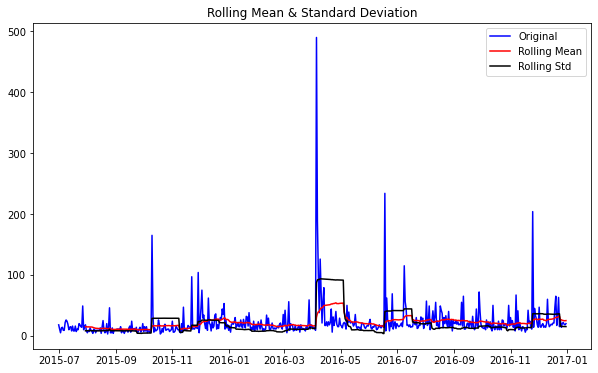

Results of Dickey Fuller Test:
p-value 1.2946704090248327e-14
H0 is rejected. Signal is stationary.


In [104]:
test_stationarity(df, 30)

**As d greater than 2 is not supported to make ARIMA model I check it with window size 2 as well.**

#### Question 2: Is there a relationship between window size and d used in ARIMA model?

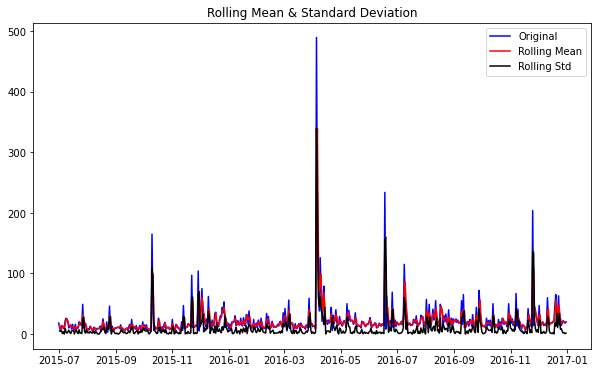

Results of Dickey Fuller Test:
p-value 1.2946704090248327e-14
H0 is rejected. Signal is stationary.


In [119]:
test_stationarity(df, 2)

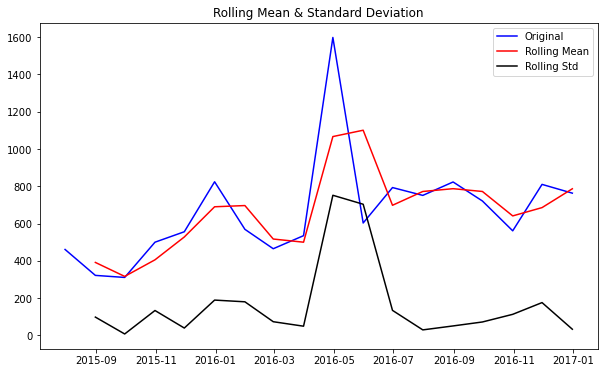

Results of Dickey Fuller Test:
p-value 0.005966865223476855
H0 is rejected. Signal is stationary.


In [105]:
test_stationarity(df_m, 2)

As our timeseries is stationary we don't need to transform it in anyway to make it stationary. We can directly build our ARIMA model.

### Building ARIMA model

Using Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF) to calculate d, P and Q of the model.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


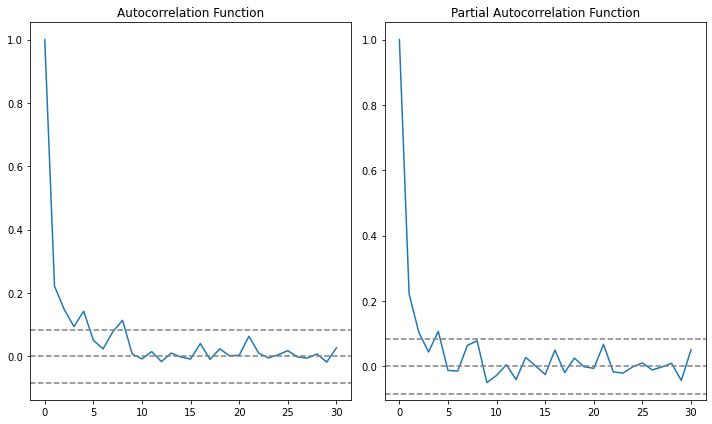

In [108]:
lag_acf = acf(df, nlags=30)
lag_pacf = pacf(df, nlags=30, method='ols') ## "ols" : regression of time series on lags of it and on constant.

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()          

In [109]:
lag_pacf

array([ 1.        ,  0.22134248,  0.10380162,  0.04372265,  0.10686893,
       -0.01269369, -0.01503207,  0.06406257,  0.07771091, -0.05019146,
       -0.02799896,  0.00477705, -0.04074146,  0.02699021,  0.00120895,
       -0.02546597,  0.0495776 , -0.01935478,  0.02490665, -0.00159291,
       -0.00636728,  0.0668008 , -0.01720352, -0.02095993, -0.00197624,
        0.0102028 , -0.01124489, -0.00236337,  0.00899147, -0.04354795,
        0.05067927])

In [110]:
lag_acf

array([ 1.        ,  0.22134106,  0.14768479,  0.09332953,  0.14209041,
        0.04995974,  0.02312508,  0.07704796,  0.11350379,  0.0064978 ,
       -0.00868239,  0.01456744, -0.01720921,  0.00977907, -0.00263061,
       -0.00910504,  0.04001271, -0.01015419,  0.02319333,  0.00144908,
        0.00273029,  0.06299227,  0.00955963, -0.00560926,  0.00427903,
        0.01736872, -0.00220515, -0.00608648,  0.00713019, -0.01852562,
        0.02598145])

In [149]:
# P = PACF at y = 0
P = 4

# number of dependent steps backwards
d = 1

# Q = ACF at y = 0
# Q = 10

Q = 7

In [150]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Plotting AR model


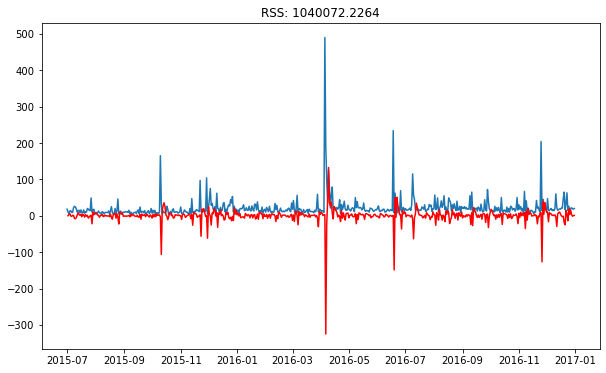

In [167]:
#AR Model: Q = 0
model = ARIMA(df, order=(P,d,0))
results_AR = model.fit(disp=-1)
plt.plot(df)
plt.plot(results_AR.fittedvalues, color='red')

# Becasue of d=1 skip the first record in df['2NE1_zh.wikipedia.org_all-access_spider'] by adding [1:] 
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df['2NE1_zh.wikipedia.org_all-access_spider'][1:])**2))
print('Plotting AR model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Plotting MA model


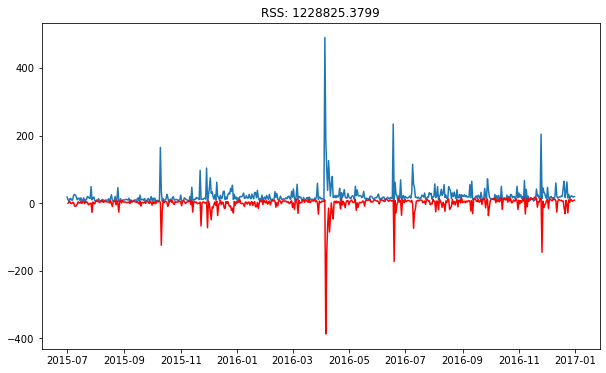

In [165]:
#MA Model: P = 0
model = ARIMA(df, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(df)
plt.plot(results_MA.fittedvalues, color='red')

# Becasue of d=1 skip the first record in df['2NE1_zh.wikipedia.org_all-access_spider'] by adding [1:] 
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - df['2NE1_zh.wikipedia.org_all-access_spider'][1:])**2))
print('Plotting MA model')

In [161]:
results_MA

In [162]:
results_MA.fittedvalues

date_idx
2015-07-02     0.024592
2015-07-03     2.826997
2015-07-04     5.345714
2015-07-05    -0.491540
2015-07-06    -1.279740
                ...    
2016-12-27    11.953537
2016-12-28     7.467022
2016-12-29     5.563990
2016-12-30     8.034913
2016-12-31     8.958799
Length: 549, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 re

Plotting ARIMA model


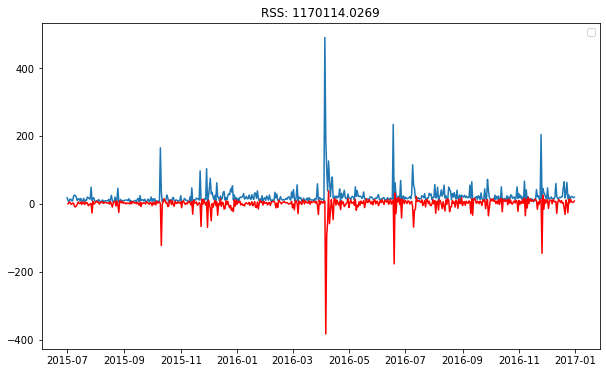

In [168]:
#ARIMA Model (Auto Regressor)
model = ARIMA(df, order=(P,d,Q)) # The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.

# with (4, 2, 10)
# ValueError: The computed initial MA coefficients are not invertible
# You should induce invertibility, choose a different model order, or you can
# pass your own start_params.

results_AR = model.fit(disp=-1)
plt.plot(df)
plt.plot(results_AR.fittedvalues, color='red')
plt.legend(loc='best')

# Becasue of d=1 skip the first record in df['2NE1_zh.wikipedia.org_all-access_spider'] by adding [1:] 
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df['2NE1_zh.wikipedia.org_all-access_spider'][1:])**2))
print('Plotting ARIMA model')

### Question 3: According to ACF charts, Q should be 9 or 10. But with any value equal higher than 8 I am getting the following error. What is the reason for that?

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

I checked these links [link1](https://stackoverflow.com/questions/52815990/valueerror-the-computed-initial-ma-coefficients-are-not-invertible-you-should-i) and [link2](https://stackoverflow.com/questions/30901460/non-invertible-of-a-arima-model), but couldn't understand the reason.

Also d cannot be greater than 2. Why is it that way? 

### Question 4: Why with P =4, d= 1, Q = 7 ARIMA model is being totally reverse? How can this be?

### Question 5: What is RSS? Why RSS is so high in comparison with other notebook? (1.0292)

More information available at [kaggle tsa](https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima).


Answer [stackoverflow](https://stackoverflow.com/questions/50313292/computing-rss-of-arima-model).

### Prediction

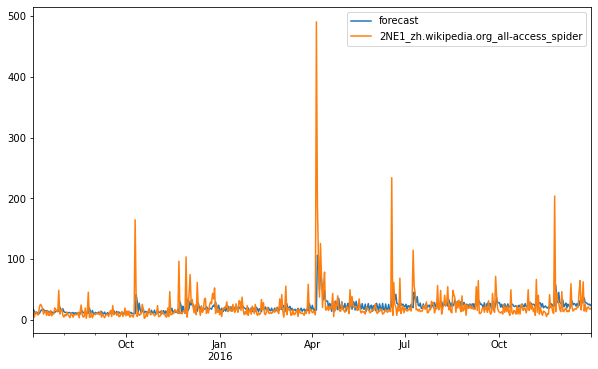

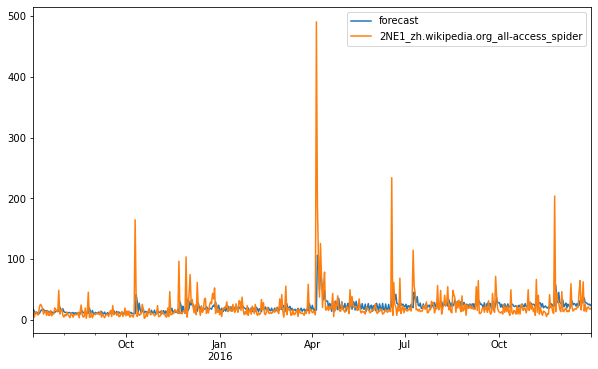

In [170]:
results_AR.plot_predict()

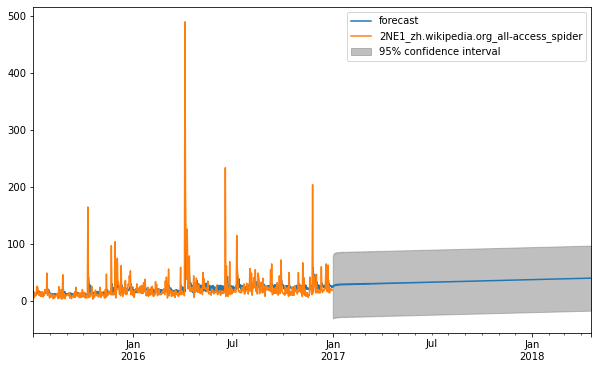

In [181]:
results_AR.plot_predict(1, 1024) 
x=results_AR.forecast(steps=120) # steps:The number of out of sample forecasts from the end of the sample

In [186]:
x[0]  # includes 120 points, same as number of steps.

array([24.29123739, 25.54800046, 27.64381044, 26.07926803, 27.52113141,
       28.71387233, 27.20084217, 28.52552163, 29.09300216, 27.54243093,
       29.11297962, 29.04996384, 27.77572783, 29.47152283, 28.8851771 ,
       28.01562931, 29.70316734, 28.69177163, 28.29868816, 29.83251145,
       28.51995792, 28.61893978, 29.87131879, 28.39861067, 28.95697222,
       29.83132459, 28.34534557, 29.289189  , 29.72843354, 28.36884689,
       29.5926607 , 29.58264469, 28.46971414, 29.8479717 , 29.41653548,
       28.64122267, 30.04107032, 29.25322366, 28.87046678, 30.16435012,
       29.11427243, 29.139925  , 30.21702285, 29.01781395, 29.4293365 ,
       30.20482587, 28.97707816, 29.71771723, 30.13913985, 28.99944848,
       29.98532888, 30.03563447, 29.08610503, 30.21542436, 29.91259375,
       29.23225697, 30.39562243, 29.78909282, 29.4279104 , 30.51880553,
       29.68320212, 29.65907216, 30.58348486, 29.61038236, 29.90925488,
       30.59362818, 29.58220735, 30.16112866, 30.55799581, 29.60

### Question 6: what does step show in forecast() function?

steps:The number of out of sample forecasts from the end of the sample.

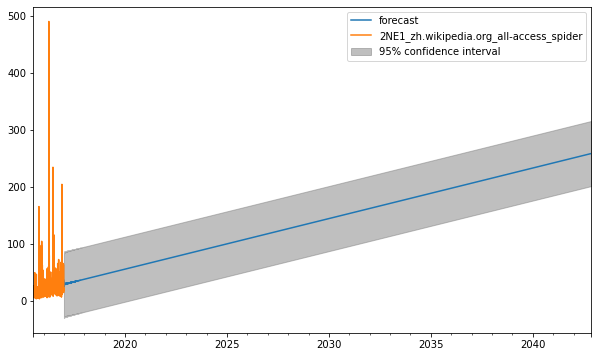

In [187]:
results_AR.plot_predict(1, 10000) 
x=results_AR.forecast(steps=120) 

Here you can see the limitation of tsa and prediction altogether. The band is already disbanded. But according to this chart by 2040 still it will be searched which is obviously not the case.